In [ ]:
import numpy as np
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

import pymc as pm

# 1. Perfectly Linear Data

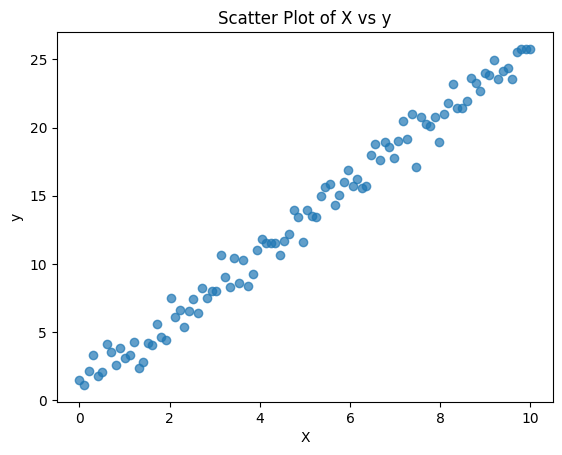

In [3]:
# Generate synthetic data
np.random.seed(42)

X = np.linspace(0, 10, 100) # 100 data points from 0 to 10

true_slope = 2.5
true_intercept = 1.0
noise = np.random.normal(0, 1, size=X.shape)
y = true_slope * X + true_intercept + noise # y = mx + b + noise

plt.scatter(X, y, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of X vs y")
plt.show()

## Parameter Estimate Method

In [4]:
# Least Squares Method
X_reshaped = X.reshape(-1, 1)
ls_model = LinearRegression()
ls_model.fit(X_reshaped, y)
ls_slope = ls_model.coef_[0]
ls_intercept = ls_model.intercept_

In [5]:
# Maximum Likelihood Estimation
def negative_log_likelihood(params):
    slope, intercept, sigma = params
    predicted = slope * X + intercept
    residuals = y - predicted
    nll = 0.5 * np.sum(np.log(2 * np.pi * sigma**2) + (residuals**2) / sigma**2)
    return nll

initial_guess = [1.0, 1.0, 1.0]  # Initial guesses for slope, intercept, and sigma
result = minimize(negative_log_likelihood, initial_guess, bounds=[(None, None), (None, None), (1e-6, None)]) # Minimize the NLL
mle_slope, mle_intercept, mle_sigma = result.x

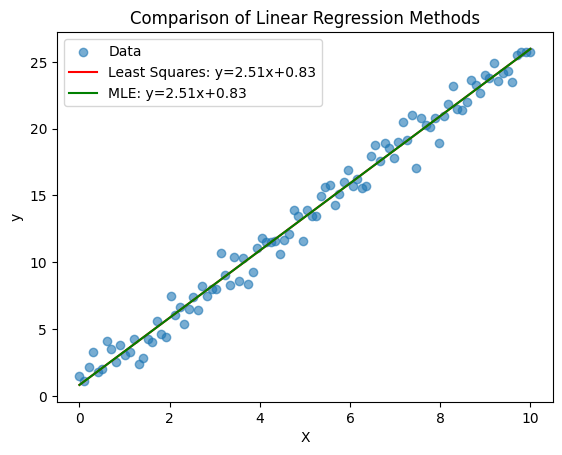

In [6]:
# Plotting the results
plt.scatter(X, y, label="Data", alpha=0.6)
plt.plot(X, ls_slope * X + ls_intercept, label=f"Least Squares: y={ls_slope:.2f}x+{ls_intercept:.2f}", color="red")
plt.plot(X, mle_slope * X + mle_intercept, label=f"MLE: y={mle_slope:.2f}x+{mle_intercept:.2f}", color="green")
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of Linear Regression Methods")
plt.show()

# 2. data with highly varying heteroscedasticity

Text(0.5, 1.0, 'Scatter Plot of X vs y with Heteroscedasticity')

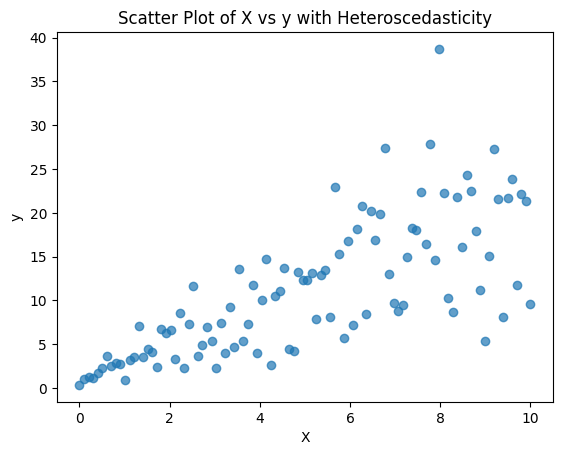

In [7]:
# Generate synthetic 
np.random.seed(42)
X_demo = np.linspace(0, 10, 100)
true_slope_demo = 2.0
true_intercept_demo = 1.0
noise_variance_demo = 0.1 + 0.5 * X_demo**2  # Quadratically increasing variance
noise_demo = np.random.normal(0, np.sqrt(noise_variance_demo))

# y_demo = true_slope_demo * X_demo + true_intercept_demo + noise_demo # Adding heteroscedasticity (Minimal)
y_demo = true_slope_demo * X_demo + true_intercept_demo + np.random.normal(0, np.sqrt(noise_variance_demo * 2)) # Adding heteroscedasticity (Maximal)

plt.scatter(X_demo, y_demo, alpha=0.7)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter Plot of X vs y with Heteroscedasticity")

Performance Metrics for LSE:
Mean Squared Error (MSE): 26.7343
R-squared (R2): 0.5489

Performance Metrics for MLE:
Mean Squared Error (MSE): 27.0829
R-squared (R2): 0.5431


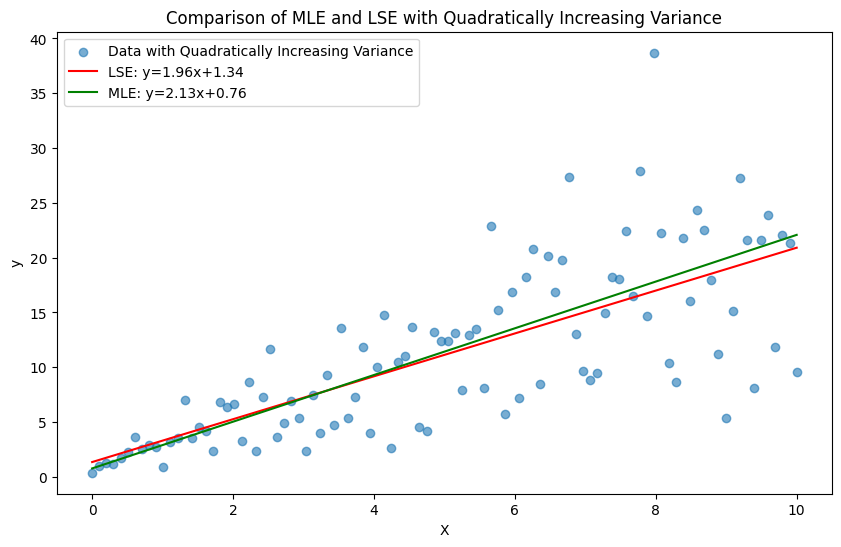

In [22]:
# Least Squares Method
X_demo_reshaped = X_demo.reshape(-1, 1)
ls_model_demo = LinearRegression()
ls_model_demo.fit(X_demo_reshaped, y_demo)
ls_slope_demo = ls_model_demo.coef_[0]
ls_intercept_demo = ls_model_demo.intercept_

# Maximum Likelihood Estimation
def negative_log_likelihood_demo(params):
    slope, intercept, sigma_base, sigma_slope = params
    predicted = slope * X_demo + intercept
    sigma = sigma_base + sigma_slope * X_demo**2
    residuals = y_demo - predicted
    nll = 0.5 * np.sum(np.log(2 * np.pi * sigma) + (residuals**2) / sigma)
    return nll

initial_guess_demo = [1.0, 1.0, 0.1, 0.1]  # Initial guesses for slope, intercept, sigma_base, and sigma_slope
result_demo = minimize(
    negative_log_likelihood_demo,
    initial_guess_demo,
    bounds=[(None, None), (None, None), (1e-6, None), (1e-6, None)]
)
mle_slope_demo, mle_intercept_demo, mle_sigma_base_demo, mle_sigma_slope_demo = result_demo.x

# Predictions for LSE and MLE
y_pred_lse_demo = ls_slope_demo * X_demo + ls_intercept_demo
y_pred_mle_demo = mle_slope_demo * X_demo + mle_intercept_demo

# Compute metrics for LSE
mse_lse_demo = mean_squared_error(y_demo, y_pred_lse_demo)
r2_lse_demo = r2_score(y_demo, y_pred_lse_demo)

# Compute metrics for MLE
mse_mle_demo = mean_squared_error(y_demo, y_pred_mle_demo)
r2_mle_demo = r2_score(y_demo, y_pred_mle_demo)

# Print the results
print("Performance Metrics for LSE:")
print(f"Mean Squared Error (MSE): {mse_lse_demo:.4f}")
print(f"R-squared (R2): {r2_lse_demo:.4f}")

print("\nPerformance Metrics for MLE:")
print(f"Mean Squared Error (MSE): {mse_mle_demo:.4f}")
print(f"R-squared (R2): {r2_mle_demo:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_demo, y_demo, label="Data with Quadratically Increasing Variance", alpha=0.6)
plt.plot(
    X_demo,
    y_pred_lse_demo,
    label=f"LSE: y={ls_slope_demo:.2f}x+{ls_intercept_demo:.2f}",
    color="red"
)
plt.plot(
    X_demo,
    y_pred_mle_demo,
    label=f"MLE: y={mle_slope_demo:.2f}x+{mle_intercept_demo:.2f}",
    color="green"
)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of MLE and LSE with Quadratically Increasing Variance")
plt.show()

MLE estimates with heteroscedasticity:
Slope: 2.1316
Intercept: 0.7599
Sigma Base: 0.0677
Sigma Slope: 0.9416

Performance Metrics for LSE:
Mean Squared Error (MSE): 26.7343
R-squared (R2): 0.5489

Performance Metrics for MLE with Heteroscedasticity:
Mean Squared Error (MSE): 27.0829
R-squared (R2): 0.5431


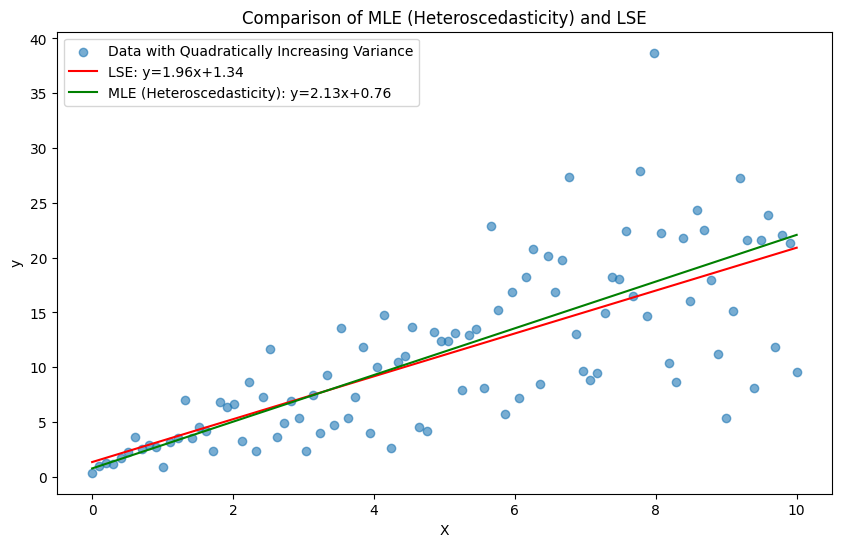

In [24]:
# Define the negative log-likelihood function for heteroscedasticity
def heteroscedastic_nll(params, X, y):
    slope, intercept, sigma_base, sigma_slope = params
    predicted = slope * X + intercept
    sigma = sigma_base + sigma_slope * X**2  # Variance depends on X
    residuals = y - predicted
    nll = 0.5 * np.sum(np.log(2 * np.pi * sigma) + (residuals**2) / sigma)
    return nll

# Initial guesses for slope, intercept, sigma_base, and sigma_slope
initial_guess_hetero = [1.0, 1.0, 0.1, 0.1]

# Minimize the negative log-likelihood
result_hetero = minimize(
    heteroscedastic_nll,
    initial_guess_hetero,
    args=(X_demo, y_demo),
    bounds=[(None, None), (None, None), (1e-6, None), (1e-6, None)]
)

# Extract the estimated parameters
mle_slope_hetero, mle_intercept_hetero, mle_sigma_base_hetero, mle_sigma_slope_hetero = result_hetero.x

# Print the results
print("MLE estimates with heteroscedasticity:")
print(f"Slope: {mle_slope_hetero:.4f}")
print(f"Intercept: {mle_intercept_hetero:.4f}")
print(f"Sigma Base: {mle_sigma_base_hetero:.4f}")
print(f"Sigma Slope: {mle_sigma_slope_hetero:.4f}\n")

# Predictions for LSE and MLE with heteroscedasticity
y_pred_lse_demo = ls_slope_demo * X_demo + ls_intercept_demo
y_pred_mle_hetero_demo = mle_slope_hetero * X_demo + mle_intercept_hetero

# Compute metrics for LSE
mse_lse_demo = mean_squared_error(y_demo, y_pred_lse_demo)
r2_lse_demo = r2_score(y_demo, y_pred_lse_demo)

# Compute metrics for MLE with heteroscedasticity
mse_mle_hetero_demo = mean_squared_error(y_demo, y_pred_mle_hetero_demo)
r2_mle_hetero_demo = r2_score(y_demo, y_pred_mle_hetero_demo)

# Print the results
print("Performance Metrics for LSE:")
print(f"Mean Squared Error (MSE): {mse_lse_demo:.4f}")
print(f"R-squared (R2): {r2_lse_demo:.4f}")

print("\nPerformance Metrics for MLE with Heteroscedasticity:")
print(f"Mean Squared Error (MSE): {mse_mle_hetero_demo:.4f}")
print(f"R-squared (R2): {r2_mle_hetero_demo:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_demo, y_demo, label="Data with Quadratically Increasing Variance", alpha=0.6)
plt.plot(
    X_demo,
    y_pred_lse_demo,
    label=f"LSE: y={ls_slope_demo:.2f}x+{ls_intercept_demo:.2f}",
    color="red"
)
plt.plot(
    X_demo,
    y_pred_mle_hetero_demo,
    label=f"MLE (Heteroscedasticity): y={mle_slope_hetero:.2f}x+{mle_intercept_hetero:.2f}",
    color="green"
)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of MLE (Heteroscedasticity) and LSE")
plt.show()


c:\Users\megat\Documents\Code_Repositories\03 SMA\ProbStatsL3\repo\.venv\Lib\site-packages\rich\live.py:231: 
UserWarning: install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

MLE Estimates:
beta0: 0.9610
beta1: 2.0483
gamma: 0.2669
sigma: [ 1.          1.02732799  1.0554028   1.08424484  1.11387508  1.14431505
  1.17558688  1.20771331  1.24071769  1.27462401  1.30945693  1.34524176
  1.38200451  1.41977192  1.45857144  1.49843127  1.53938038  1.58144856
  1.62466637  1.66906524  1.71467744  1.76153614  1.80967538  1.85913018
  1.90993647  1.9621312   2.01575231  2.07083877  2.12743064  2.18556904
  2.24529626  2.3066557   2.36969196  2.43445089  2.50097954  2.56932629
  2.63954082  2.71167417  2.78577878  2.86190852  2.94011874  3.02046628
  3.10300956  3.18780858  3.27492499  3.36442211  3.45636501  3.55082053
  3.64785732  3.74754594  3.84995885  3.95517049  4.06325736  4.17429802
  4.28837321  4.40556584  4.52596111  4.64964654  4.77671204  4.90724999
  5.04135528  5.1791254   5.3206605   5.46606346  5.61544     5.7688987
  5.92655112  6.08851187  6.25489867  6.42583249  6.60143759  6.78184163
  6.96717574  7.15757467  7.35317681  7.55412437  7.76056342 

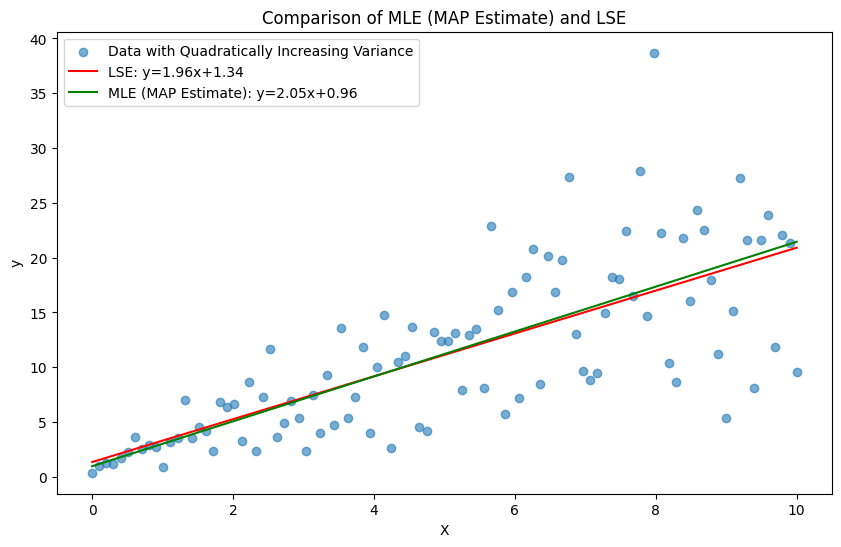

In [25]:
# Model
with pm.Model() as model:
    # Priors (uninformative to mimic MLE)
    beta0 = pm.Flat("beta0")         # Intercept
    beta1 = pm.Flat("beta1")         # Slope
    gamma = pm.Flat("gamma")         # Coefficient for heteroscedasticity
    sigma = pm.Deterministic("sigma", pm.math.exp(gamma * X_demo))  # Variance depends on X_demo

    # Expected value of outcome
    mu = beta0 + beta1 * X_demo

    # Likelihood (Gaussian errors with heteroscedasticity)
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y_demo)

    # MAP estimation (equivalent to MLE here)
    map_estimate = pm.find_MAP()

# Show results
print("MLE Estimates:")
for k, v in map_estimate.items():
    try:
        print(f"{k}: {v:.4f}")
    except TypeError:
        print(f"{k}: {v}")


# Predictions for LSE and MLE with the new MAP estimate
y_pred_lse_demo = ls_slope_demo * X_demo + ls_intercept_demo
y_pred_mle_map_demo = map_estimate["beta0"] + map_estimate["beta1"] * X_demo

# Compute metrics for LSE
mse_lse_demo = mean_squared_error(y_demo, y_pred_lse_demo)
r2_lse_demo = r2_score(y_demo, y_pred_lse_demo)

# Compute metrics for MLE with the new MAP estimate
mse_mle_map_demo = mean_squared_error(y_demo, y_pred_mle_map_demo)
r2_mle_map_demo = r2_score(y_demo, y_pred_mle_map_demo)

# Print the results
print("\nPerformance Metrics for LSE:")
print(f"Mean Squared Error (MSE): {mse_lse_demo:.4f}")
print(f"R-squared (R2): {r2_lse_demo:.4f}")

print("\nPerformance Metrics for MLE (MAP Estimate):")
print(f"Mean Squared Error (MSE): {mse_mle_map_demo:.4f}")
print(f"R-squared (R2): {r2_mle_map_demo:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_demo, y_demo, label="Data with Quadratically Increasing Variance", alpha=0.6)
plt.plot(
    X_demo,
    y_pred_lse_demo,
    label=f"LSE: y={ls_slope_demo:.2f}x+{ls_intercept_demo:.2f}",
    color="red"
)
plt.plot(
    X_demo,
    y_pred_mle_map_demo,
    label=f"MLE (MAP Estimate): y={map_estimate['beta1']:.2f}x+{map_estimate['beta0']:.2f}",
    color="green"
)
plt.legend()
plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparison of MLE (MAP Estimate) and LSE")
plt.show()

# MLE - with adjustment

In [ ]:
import pymc as pm
import numpy as np

n = 100
x = np.linspace(0, 10, n)
X = np.column_stack([np.ones(n), x])
true_beta = [1.0, 2.0]
mu = X @ true_beta

# Simulate AR(1) errors
rho = 0.8
errors = np.zeros(n)
errors[0] = np.random.normal()
for i in range(1, n):
    errors[i] = rho * errors[i - 1] + np.random.normal()
y = mu + errors

## Correlated Errors

In [ ]:

# Build MLE model in PyMC with AR(1) structure
with pm.Model() as ar_model:
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.Exponential("sigma", 1)
    rho = pm.Uniform("rho", -0.99, 0.99)

    mu = beta[0] + beta[1] * x

    # AR(1) error structure
    cov = sigma**2 / (1 - rho**2) * pm.gp.cov.ExpQuad(1, 1e-5)(np.arange(n)[:, None])
    obs = pm.MvNormal("obs", mu=mu, cov=cov, observed=y)

    trace = pm.sample(max_treedepth=10, target_accept=0.95)

# You can also use pm.find_MAP() for MLE specifically (no sampling)


## Heteroscedastic Errors

In [ ]:
with pm.Model() as hetero_model:
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    gamma = pm.Normal("gamma", mu=0, sigma=2)

    mu = beta[0] + beta[1] * x
    sigma = pm.math.exp(gamma * x)  # variance depends on x

    obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=y)
    trace = pm.find_MAP()


## Non-Gaussian Errors

### Binary Outcome (Logistic regression via MLE)

In [ ]:
from scipy.optimize import minimize
from scipy.special import expit  # sigmoid

def log_likelihood(params, X, y):
    beta = params
    p = expit(X @ beta)
    return -np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))  # negative log-likelihood

# Generate fake binary data
X = np.column_stack((np.ones(n), np.random.rand(n)))
y = np.random.binomial(1, expit(X @ [0.5, 2.0]))

res = minimize(log_likelihood, x0=np.zeros(X.shape[1]), args=(X, y))
print("MLE estimates:", res.x)


### Count Data (Poisson MLE)

In [ ]:
def poisson_loglike(params, X, y):
    beta = params
    mu = np.exp(X @ beta)
    return -np.sum(y * np.log(mu) - mu)  # Negative log-likelihood (no constant)

# Generate fake count data
X = np.column_stack((np.ones(n), np.random.rand(n)))
y = np.random.poisson(np.exp(X @ [0.3, 1.5]))

res = minimize(poisson_loglike, x0=np.zeros(X.shape[1]), args=(X, y))
print("MLE estimates (Poisson):", res.x)
